In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

### Exploratory data analysis

In [2]:
df = pd.read_csv('data.csv') #!wget $data
# Collect data

In [3]:
df.head(n=3)
# get first 3 rows from the dataframe

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [4]:
df.index

RangeIndex(start=0, stop=11914, step=1)

In [5]:
df.columns
# return list of column from data 
# the returned value is of type Index ( pandas.Index ) Object - it can be converted to python list w/ list(df.columns)
# the Index object from Pandas is used to label rows df.index and columns df.columns
# index obj is immutable ( can not change elements in place ) 
# index obj support element-wise string/number operations ( df.columns.str.lower() ) - Vectorized Ops
# index obj ensures consistent indexing/alignement across dataframes and series 
# index obj support intersection, union, diffeerence
# index obj is like a new type of data structure ( int, float, string ..etc) designated for large data

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
df.index

RangeIndex(start=0, stop=11914, step=1)

In [8]:
len(df)

11914

In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [10]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [11]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [12]:
df.head(n=2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [13]:
print(type(df.iloc[0]["make"]))
# df.iloc[0] returns the first row - type series 
# df.iloc[:, 0] return first column - type series
# df.iloc[0]["make"] return the element of index/label make in the first row 

<class 'str'>


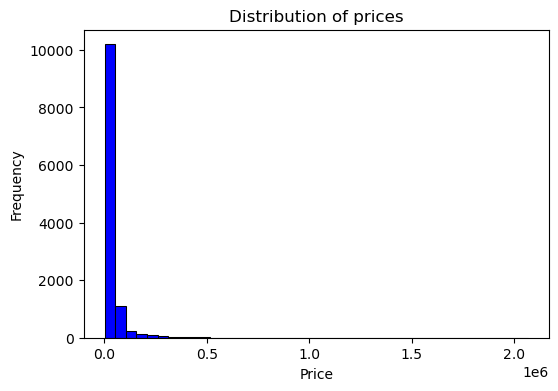

In [16]:
plt.figure(figsize=(6, 4)) #width 600 pixel by height 400 pixel

sns.histplot(df.msrp, bins=40, color='blue', alpha=1) # histogram of msrp column in df with bins (number of bars = 40 and opacity full opaque ( 0 full transparent ) 
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

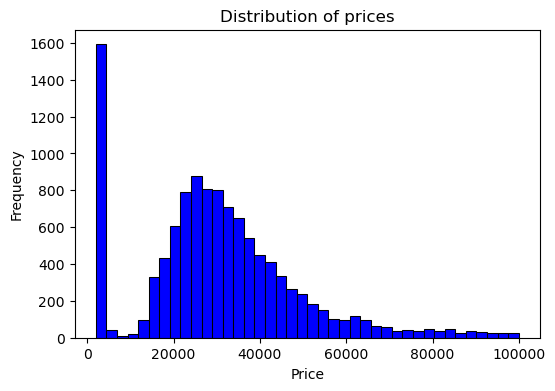

In [18]:
plt.figure(figsize=(6, 4)) #width 600 pixel by height 400 pixel

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='blue', alpha=1) # in the previous graph had a long tail distribution - long tails values were excluded
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

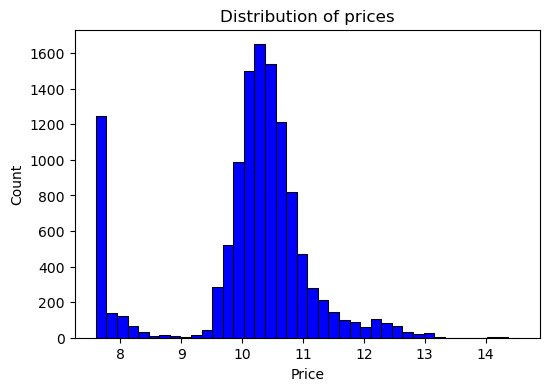

In [19]:
log_price = np.log1p(df.msrp) # applying logarithmic to price (to have less difference between small and big numbers ) 
#log1p adds a 1 before compute to avoid having log(0) which does not exists 

plt.figure(figsize=(6, 4)) 

sns.histplot(log_price, bins=40, color='blue', alpha=1) # histogram of logarithmic price
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [23]:
df.isnull().sum() # isnull returns True if cell is NaaN or None

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Validation Framework - Splitting Data

In [44]:
np.random.seed(2) # fix the randomness so it would be the same across different computers

n = len(df) # number of rows in the dataframe 

n_val = int(0.2 * n) # number of rows dedicated for validation ( 20% of total rows ) 
n_test = int(0.2 * n) # number of rows dedicated for test ( 20% of total rows ) 
n_train = n - (n_val + n_test) # number of rows dedicated for training ( rest of the rows ~ 60%) 

idx = np.arange(n) # type numpy ndarray : array from 0 to n ( number of total rows ) 
np.random.shuffle(idx) # change position of elements inside idx ( series ) 
df_shuffled = df.iloc[idx] # change position of rows inside dataframe ( dataframe ) 

#splitting data into 60%, 20% and 20% portion
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [47]:
y_train_orig =  df_train.msrp.values # save target value Y from training data
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values) # apply logarithmic to target value Y 
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp'] # delete target value column to avoid confusion
del df_val['msrp']
del df_test['msrp']

### Linear Regression

In [67]:
# We are trying to solve W.X=Y where W is weight vector : 
# W is w0 + w1.x1 + w2.x2 ... + wn.xn

def train_linear_regression(X, y): 
    ones = np.ones(X.shape[0]) # X.shape returns a tupe ( num rows , num of columns ) X.shape[0] returns num of rowsand then creates array of ones of that size
    X = np.column_stack([ones, X]) # column_stack expect a list of arrays. ones will be stacked as first column

    XTX = X.T.dot(X) # computer X Transpose multiplied by X ( Gram Matrix ) 
    XTX_inv = np.linalg.inv(XTX) # Get inverse of gram Matrix
    w = XTX_inv.dot(X.T).dot(y) # return vector w that contains bias term w0 and rest of the weigts
    
    return w[0], w[1:]

### Baseline solution

In [69]:
# list of feature (column names ) that we will use
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] 

In [68]:
def prepare_X(df):
    df_num = df[base] # return df with only selected column names
    df_num = df_num.fillna(0) # we have missing values in engine_hp and engine_cylinders so we replaced missing values with 0
    X = df_num.values # return the data without row index and column index
    return X 

In [71]:
X_train = prepare_X(df_train) # prepared X_train by selecting what features we need and getting rid of missing values

In [72]:
w_0, w = train_linear_regression(X_train, y_train) # getting weight vector

In [75]:
y_pred = w_0 + X_train.dot(w) # now we obtain a vector of Y prediction of size number of rows of of Training data

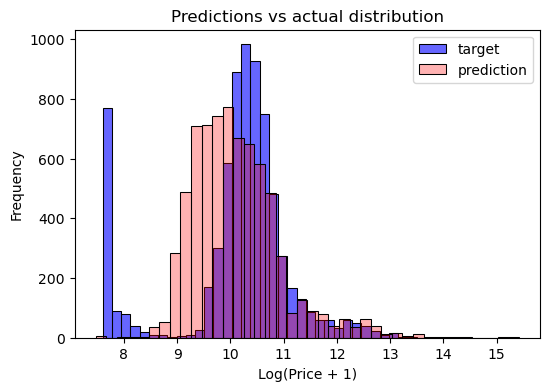

In [84]:
# displaying prediction vs target 
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.3, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [94]:
# calculate Root Mean Square Error : the difference between Y prediction and Y target
def rmse(y, y_pred):
    error = y_pred - y # arithmetic operation between 2 vectors ( type ndarray ) 
    mse = (error ** 2).mean() 
    return float(np.sqrt(mse))

In [96]:
rmse(y_train, y_pred) # this is how far is our target from prediction - the lower it is the better. be careful of overfit. 

0.7554192603920132

### Simple Feature Engineering

In [101]:
def prepare_X(df):
    df = df.copy() # copy the dataframe
    features = base.copy() #copy the array containing the column names

    df['age'] = 2017 - df.year # 2017 was identified as the most recent record. create new column age containing the age of the car
    features.append('age') # add feature to the list of features

    df_num = df[features] # returns dataframe with selected columns ( including new feature ) 
    df_num = df_num.fillna(0) # fill missing NaaN/None value with 0 
    X = df_num.values # return value of row and columns with label 
    return X

In [103]:
X_train = prepare_X(df_train) # using new list of feature
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred)) #y_pred dropped from 0.75 to 0.51 by including this new feature age

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred)) 

train 0.5175055465840046
validation 0.5172055461058291


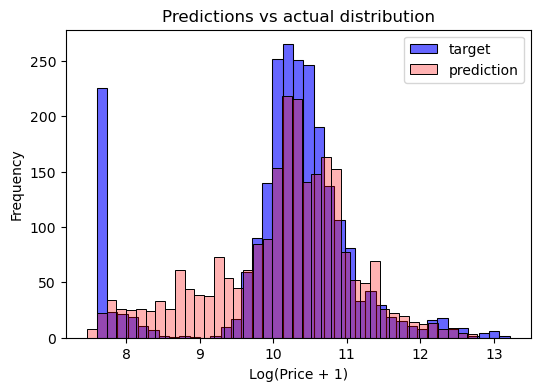

In [104]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.3, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [105]:
df['make'].value_counts().head(5) # count occurence of each unique value in column make - show only top 5


make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [106]:
# we are changing prepare_X that was previously defined to add feature age 
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v # we are creating new feature with column name num_doors_2, num_doors_3, num_doors_4
        df[feature] = (df['number_of_doors'] == v).astype(int) #will create new column num_doors_2 and fill with 1 if true 0 if not. iterate over v
        features.append(feature) # add feature name num_doors_2

    #same as above _ we create new feature is_make_chevrolet that will be a column containing 1 if true and 0 if false
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [114]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w) # slight improvement from 0.51 to 0.50 
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.5076038849556025


In [115]:
df['engine_fuel_type'].value_counts() # count unique values in engine_fuel_type

engine_fuel_type
regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: count, dtype: int64

In [116]:
# creating new feature for engine_fuel_type
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    
    #same as in previous func def - we create new feature is_type_regular_unleaded that will be a column containing 1 if true and 0 if false

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [117]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w) # prediction dropped from 0.5 to 0.47
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.4748256737224437


In [118]:
df['transmission_type'].value_counts() # show unique values in transmission_type

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [128]:
# creating new feature for transmission_type
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [130]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w) # dropped by 0.001 - no signficant change
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924004
validation: 0.4685879194656906


### Regularization

In [131]:
# we are introducing a new arg r in our previous function
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0]) 
    XTX = XTX + reg # we are adding a number in form of I matrice to the gram matrice XTX

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:] #return new weight vector ( bias term and the rest of weights ) 

In [132]:
X_train = prepare_X(df_train)

In [134]:
# we are looping here to find the best r value 
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[20]))

    0, 11.52, -0.14, -0.13
0.001, 11.52, -0.14, -0.13
 0.01, 11.49, -0.14, -0.13
  0.1, 11.22, -0.14, -0.10
    1, 9.51, -0.13, 0.17
   10, 6.11, -0.12, 1.12


In [140]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01) # trying with r=0.001

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4745387229618779
val 0.46861029160219436


In [141]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.468587921697589
0.0001 0.4685881426435797
 0.001 0.46859015174173224
  0.01 0.46861029160219436
   0.1 0.46881610902291404
     1 0.4710847667626094
     5 0.48136260653686935
    10 0.4926865711195577


### Using the model

In [144]:
# now we will use the test dataframe df_test
i = 2
ad = df_test.iloc[i].to_dict() # get row number 2 and convert it to dictionary ( this is how our endpoint will get the data ) 
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [158]:
X_test = prepare_X(pd.DataFrame([ad]))[0] # we use [0] because it is one array, if it is 2 row then it will return a list of arrays
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred) # convert back because we used logarithmic on Y at the beginning
suggestion

np.float64(26329.5926097353)

In [167]:
np.expm1(y_test[2])

np.float64(31119.999999999985)